<a href="https://colab.research.google.com/github/kartiksharma2383/Machine-Learning/blob/main/XGBoost_in_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# XGBoost(It is an algorithm that builds an ensemble of decision trees step by step, where each new tree fixes the errors made by the previous ones)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
from xgboost import XGBRegressor, XGBClassifier

In [3]:
df = pd.read_csv("/content/winequality-red(ML - Gradient Boosting datset).csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.shape

(1599, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# Predict wine quality score using regression
# df.drop("quality", axis = 1): Creates a new DataFrame without the "quality" column and axis = 1 drop a column
# y_reg = df["quality"]: Selects the "quality" column as your target variable (y).
x = df.drop("quality", axis = 1)
y_reg = df["quality"]
x_train, x_test, y_train, y_test = train_test_split(x, y_reg, test_size = 0.2, random_state = 42)

In [9]:
# n_estimators: Number of boosting stages (i.e., how many trees will be built sequentially)
# learning rate: How much each tree contributes to the final prediction, smaller values gives slower learning but can improve generalization.
# max_depth: Maximum depth of each decision tree (weak learner) it controls complexity.
# subsample: Fraction of training data used for fitting each tree, it helps to reduce overfitting.
# colsample_bytree: Fraction of features (columns) used for building each tree, it helps to reduce overfitting.
# reg_lambda: Method to prevent the model from training data to much which helps to prevent overfitting
xgbr = XGBRegressor(n_estimators = 500, learning_rate = 0.05, max_depth = 4, subsample = 0.8, colsample_bytree = 0.8, reg_lambda = 1, random_state = 42)
xgbr.fit(x_train, y_train, eval_set = [(x_test, y_test)], verbose = False)
y_pred = xgbr.predict(x_test)

In [10]:
# mse: Average squared difference between the actual values (y_true) and predicted values (y_pred), used to find prediction absolute term
# r2_score: It measures how well your model explains the variance of the target variable.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Regression")
print(f"Mean Squared Error: {mse:.3f}")
print(f"R2 Score: {r2:.3f}")

Regression
Mean Squared Error: 0.326
R2 Score: 0.501


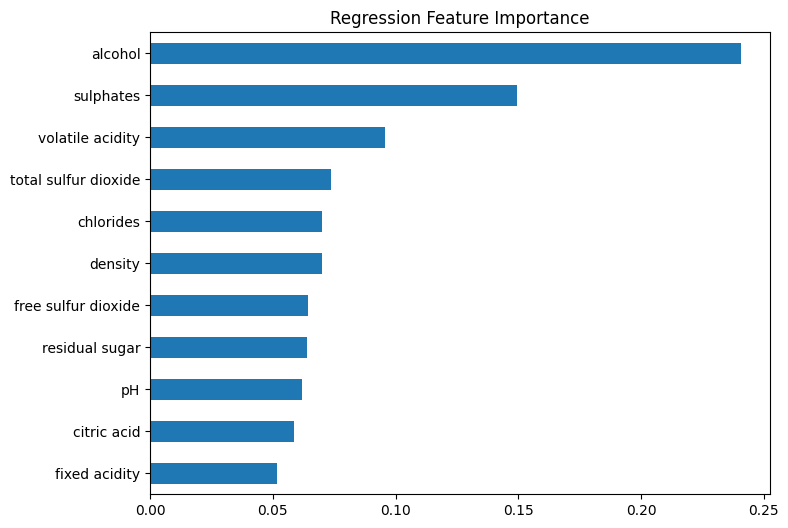

In [11]:
# pd.Series: It is 1-D array panda series, to map values to labels
# sort_values(): Sorts features by importance from smallest to largest.
# plot(kind='barh'): Creates a horizontal bar chart for easy visualization.
feat_importance = pd.Series(xgbr.feature_importances_, index = x.columns)
feat_importance.sort_values().plot(kind = 'barh', figsize = (8,6), title = 'Regression Feature Importance')
plt.show()

In [15]:
# Categorize wine quality using classification
# pd.cut(): bins numeric values into categories.
# bins=[2,4,6,8]: 2 < quality <= 4 is low quality, 4 < quality <= 6 is medium quality, 6 < quality <= 8 is high quality
# stratify = y_clf: It ensures proportion of "low", "medium", "high" is maintained in both train and test sets
from sklearn.preprocessing import LabelEncoder
y_clf = pd.cut(df["quality"], bins = [2,4,6,8], labels = ["low", "medium", "high"])
le = LabelEncoder()
y_clf = le.fit_transform(y_clf)
x_train, x_test, y_train, y_test = train_test_split(x, y_clf, test_size = 0.2, random_state = 42, stratify = y_clf)

In [23]:
# eval_metric(evaluation metric): It is the metric used to measure performance of the model during training and evaluation.
# mlogloss: It whether the prediction is correct, and how confident the model is in that prediction.
# verbose: It controls the level of information the model prints during training.
xgbc = XGBClassifier(
    n_estimators = 500, learning_rate = 0.05,
    max_depth = 4, subsample = 0.8,
    colsample_bytree = 0.8, reg_lambda = 1,
    random_state = 42, use_label_encoder = False, eval_metric = "mlogloss")
xgbc.fit(x_train, y_train, eval_set = [(x_test, y_test)], verbose = False)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:52:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [18]:
y_pred = xgbc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification")
print(f"Accuracy: {accuracy:.3f}") # accuracy:.3f: Shows 3 no. after decimal as a fixed point decimal or f
print(classification_report(y_test, y_pred))

Classification
Accuracy: 0.866
              precision    recall  f1-score   support

           0       0.66      0.63      0.64        43
           1       0.00      0.00      0.00        13
           2       0.90      0.95      0.92       264

    accuracy                           0.87       320
   macro avg       0.52      0.52      0.52       320
weighted avg       0.83      0.87      0.85       320



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


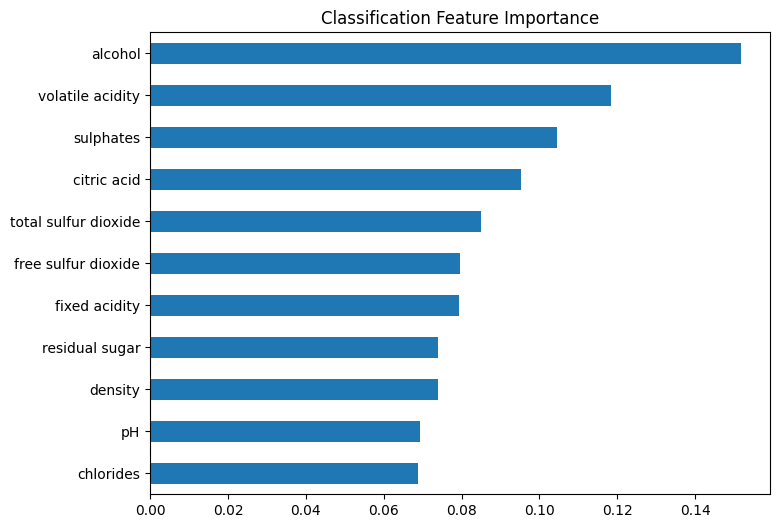

In [20]:
feat_importance = pd.Series(xgbc.feature_importances_, index = x.columns)
feat_importance.sort_values().plot(kind = 'barh', figsize = (8,6), title = 'Classification Feature Importance')
plt.show()